<a href="https://www.kaggle.com/code/dayatafl12/coffee-sales-eda-and-insights?scriptVersionId=193412052" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Introduction to Coffee Sales Analysis**
This analysis explores the coffee sales dataset collected from a vending machine, offering a detailed look at purchasing patterns, sales trends, and customer preferences over time. The dataset spans from March 2024 to the present and continues to be updated. It includes daily transaction data that reflects how customers interact with the vending machine, providing valuable insights into the overall sales performance, customer behavior, and product popularity.

**Objective**
The primary objective of this analysis is to uncover key trends and patterns in the coffee sales data. By performing a time series exploratory data analysis, we can identify patterns that will help in forecasting future sales on a daily, weekly, or monthly basis. Additionally, understanding specific customer purchases, particularly those of returning card customers, can lead to more targeted marketing and sales strategies.

**Data Overview**
The dataset comprises the following key features:

- Datetime: The timestamp of each transaction.
- Money: The amount of money spent in each transaction.
- Coffee Name: The type of coffee purchased.
- Cash Type: The payment method used (e.g., cash, card).
- Card: The unique identifier for the customer’s card, allowing for analysis of repeat customers.

This dataset offers a rich source of information to analyze and visualize trends such as daily sales performance, coffee preferences, payment methods, and the behavior of returning customers. Through various plots and visualizations, we aim to present a comprehensive overview of coffee sales, highlighting the most popular products, busiest times, and the importance of loyal customers.

**Analysis Highlights**
- Sales Trends Over Time: Visualizing daily sales trends with reference to overall, weekly, and monthly averages.
- Product Popularity: Analyzing total and count of sales by coffee type to identify bestsellers.
- Customer Behavior: Investigating the purchase patterns of returning card customers, including their preferred coffee types and the times they are most active.
- Payment Analysis: Assessing the distribution of transactions across different payment methods.
- Customer Segmentation: Differentiating between returning and casual customers to understand the impact of customer loyalty on sales.

By combining these insights, the analysis provides a clear understanding of how different factors influence coffee sales and customer choices, paving the way for more effective business decisions and strategies.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Importing necessary libraries 

- **Pandas (pd)**: Data manipulation and analysis, especially for working with structured data in DataFrames.
- **Matplotlib (plt)**: Plotting and visualizing data with static, animated, and interactive charts.
- **Seaborn (sns**): Statistical data visualization built on top of Matplotlib, offering attractive and informative charts.
- **Warnings**: Used to control the display of warning messages during script execution. Here, it’s suppressing FutureWarning messages.

In [2]:
df = pd.read_csv('/kaggle/input/coffee-sales/index.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1313 non-null   object 
 1   datetime     1313 non-null   object 
 2   cash_type    1313 non-null   object 
 3   card         1224 non-null   object 
 4   money        1313 non-null   float64
 5   coffee_name  1313 non-null   object 
dtypes: float64(1), object(5)
memory usage: 61.7+ KB


# Load a CSV file to create a dataframe. df.info() to inspect dataframe

In [3]:
# Clean and extract hour, day, month from df
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['day_name'] = df['datetime'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = pd.Categorical(df['day_name'], categories=days_order, ordered=True)
df.head()

,date,datetime,cash_type,card,money,coffee_name,hour,day,month,day_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10,1,3,Friday
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,1,3,Friday
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,1,3,Friday
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13,1,3,Friday
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13,1,3,Friday


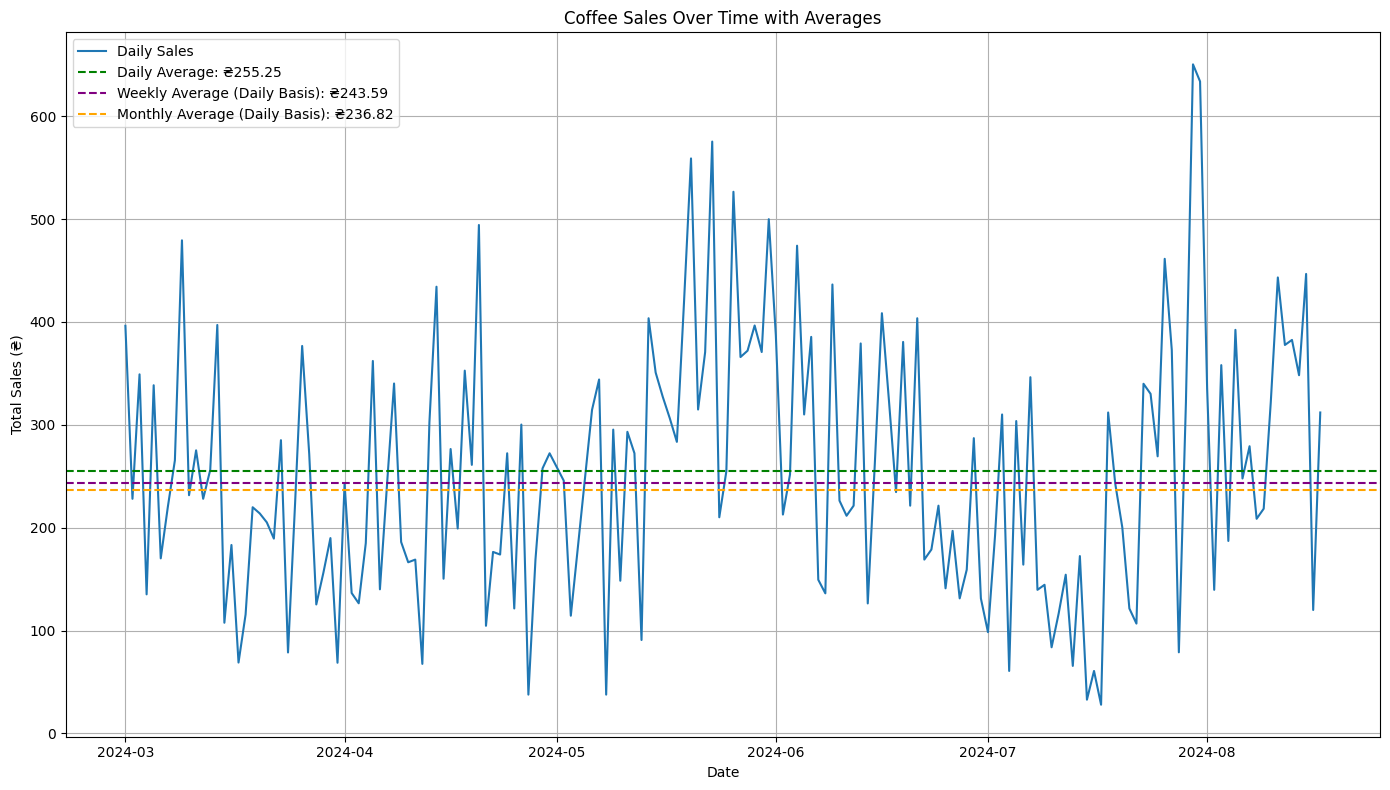

In [4]:
# ------- COFFEE SALES OVER TIME WITH AVERAGES LINE CHARTS ------- #
# Calculate total sales per day
daily_sales = df.groupby(df['datetime'].dt.date)['money'].sum()
daily_sales.index = pd.to_datetime(daily_sales.index)

# Calculate average sales, daily average, weekly average, and monthly average
daily_avg = daily_sales.mean()
weekly_avg = daily_sales.resample('W').sum().mean()
monthly_avg = daily_sales.resample('M').sum().mean()

# Plot the coffee sales over time with averages
plt.figure(figsize=(14, 8))
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales', color='tab:blue')

plt.axhline(daily_avg, color='green', linestyle='--', label=f'Daily Average: ₴{daily_avg:.2f}')
plt.axhline(weekly_avg / 7, color='purple', linestyle='--', label=f'Weekly Average (Daily Basis): ₴{weekly_avg / 7:.2f}')
plt.axhline(monthly_avg / 30, color='orange', linestyle='--', label=f'Monthly Average (Daily Basis): ₴{monthly_avg / 30:.2f}')

plt.title('Coffee Sales Over Time with Averages')
plt.xlabel('Date')
plt.ylabel('Total Sales (₴)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Coffee Sales Over Time with Averages**
**Trend**: The daily coffee sales exhibit significant variability over time, with noticeable peaks and troughs. Sales fluctuate frequently, indicating that sales are highly variable day-to-day.
Averages:
- The Daily Average is higher, showing that on average, the daily sales are substantial compared to the overall fluctuations.
- The Weekly Average and Monthly Average lines are relatively close, indicating consistent sales patterns over the week and month.

**Pattern**: The graph shows frequent spikes and drops, with no clear upward or downward trend over time. This suggests that while there are periods of higher demand, overall sales remain stable on a weekly and monthly basis.

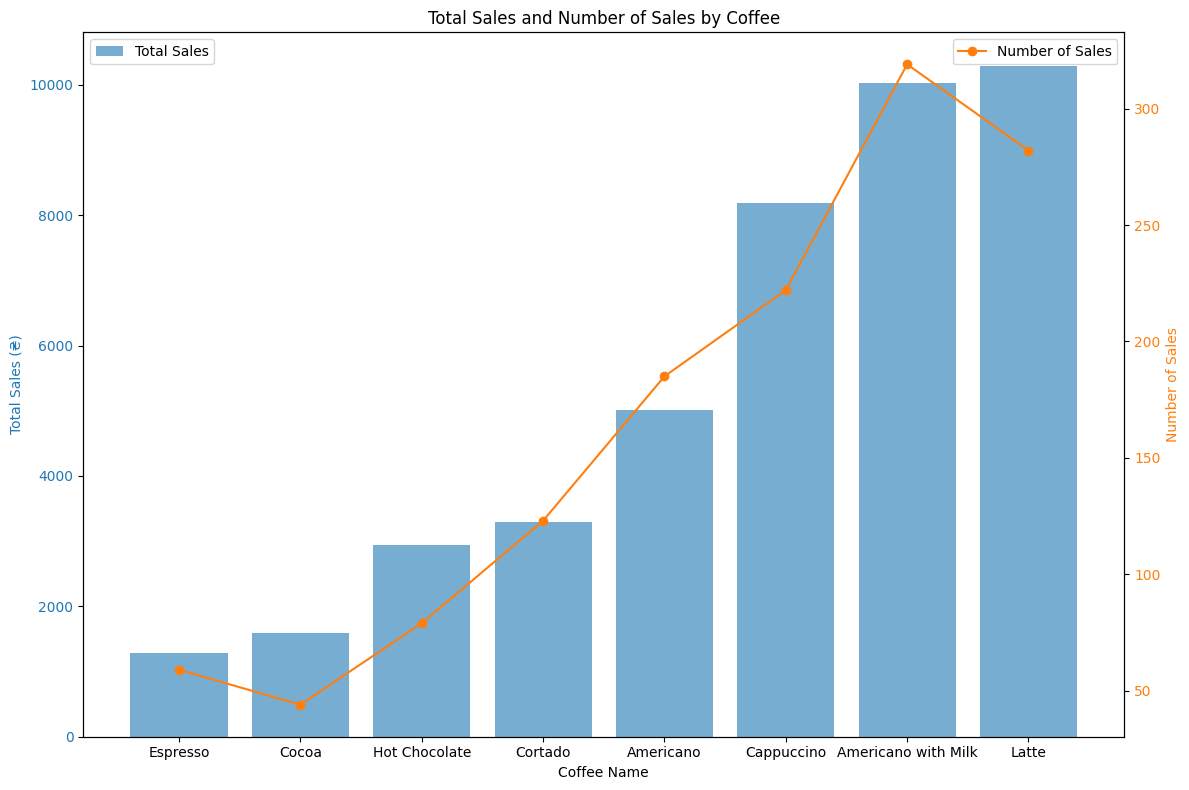

In [5]:
# ------- TOTAL SALES BY COFFEE NAME BAR LINE CHARTS ------- #
# Find total and count of sales by coffee
coffee_names = df['coffee_name'].unique()
total_sale_by_coffee = df.groupby('coffee_name')['money'].sum()
count_sale_by_coffee = df.groupby('coffee_name')['money'].count()

sorted_total_sale = total_sale_by_coffee.sort_values()
sorted_count_sale = count_sale_by_coffee.loc[sorted_total_sale.index]

# Plot total sales and count of sales by coffee name
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar chart for total sales
color = 'tab:blue'
ax1.set_xlabel('Coffee Name')
ax1.set_ylabel('Total Sales (₴)', color=color)
ax1.bar(sorted_total_sale.index, sorted_total_sale, color=color, alpha=0.6, label='Total Sales')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the number of sales
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Number of Sales', color=color)
ax2.plot(sorted_count_sale.index, sorted_count_sale, color=color, marker='o', label='Number of Sales')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Total Sales and Number of Sales by Coffee')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# **Total Sales and Number of Sales by Coffee Name**
**Trend**:
- Total Sales: Cappuccino, Americano with Milk, and Latte are the top sellers in terms of total sales revenue.
- Number of Sales: Despite similar revenue, the number of sales for different coffee varies, with some types being more popular in terms of the number of transactions but not necessarily in total revenue.

**Pattern**: The graph indicates a strong preference for milk-based coffees like Cappuccino and Latte, as they generate both high sales volume and revenue. Lower total sales but higher per-transaction value might be evident in other drinks like Espresso.

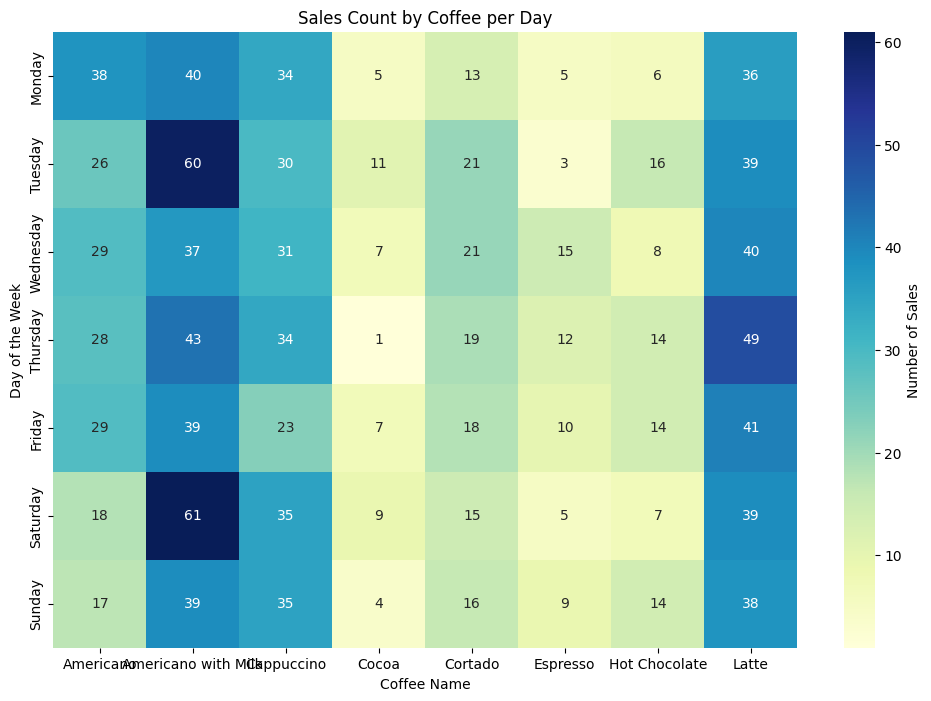

In [6]:
# ------- SALES BY COFFEE PER DAY HEATMAP ------- #
# Find sale by coffee type perday
sale_by_coffee_perday = df.groupby(['day_name', 'coffee_name'])['money'].count().unstack().fillna(0)

# Plot sales by coffee per day using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sale_by_coffee_perday, cmap='YlGnBu', annot=True, fmt='.0f', cbar_kws={'label': 'Number of Sales'})
plt.title('Sales Count by Coffee per Day')
plt.xlabel('Coffee Name')
plt.xticks(rotation='horizontal')
plt.ylabel('Day of the Week')
plt.show()

# **Sales Count by Coffee Name per Day**
**Trend**:
- Sales are distributed across the week with variations depending on the day.
- Certain coffee types like Americano with Milk and Cappuccino have higher sales on specific days, particularly on weekends.

**Pattern**: There’s a visible pattern where some coffee types are more popular on certain days. For example, Americano with Milk has high sales on Tuesdays and Saturdays. Cappuccino is consistently popular, with the highest sales on Thursdays and Saturdays.

**General Observations**: The weekend (Friday to Sunday) tends to have higher sales counts for most coffee types, particularly for those with milk, indicating a trend of increased coffee consumption during these days.

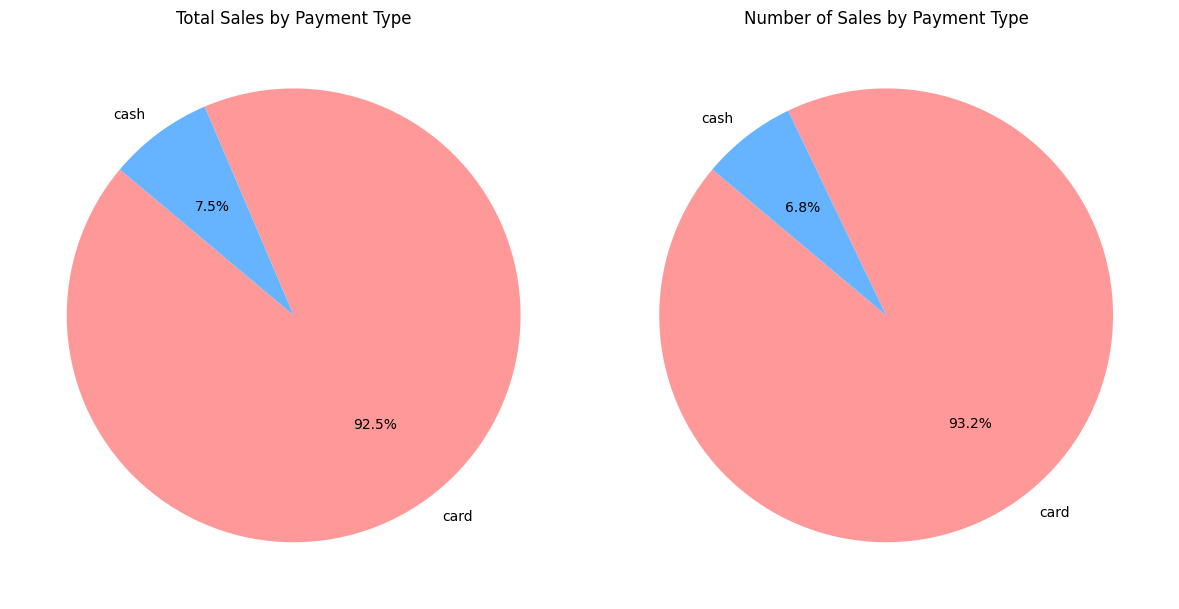

In [7]:
# ------- TOTAL SALES BY PAYMENT PIECHARTS ------- #
# Find total and count of sales by payment type
payment_type = df['cash_type'].unique()
total_sale_by_payment = df.groupby('cash_type')['money'].sum()
count_sale_by_payment = df.groupby('cash_type')['money'].count()

# Plot pie chart for total sales
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(total_sale_by_payment, labels=total_sale_by_payment.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Total Sales by Payment Type')

# Plot pie chart for number of sales
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.pie(count_sale_by_payment, labels=count_sale_by_payment.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Number of Sales by Payment Type')

plt.tight_layout()
plt.show()

# **Total Sales and Number of Sales by Payment Type**
**Trend:**
- Card Dominance: The majority of sales, both in terms of total sales (92.5%) and number of sales (93.2%), are made through card payments. Cash payments represent a small fraction of the total (7.5% and 6.8%, respectively).
- Consistency Across Metrics: The proportion of sales made by card is consistent when comparing the total sales amount to the number of sales, indicating that card payments are the predominant method for transactions.

**Pattern:** Card payments dominate both in total sales and transaction numbers

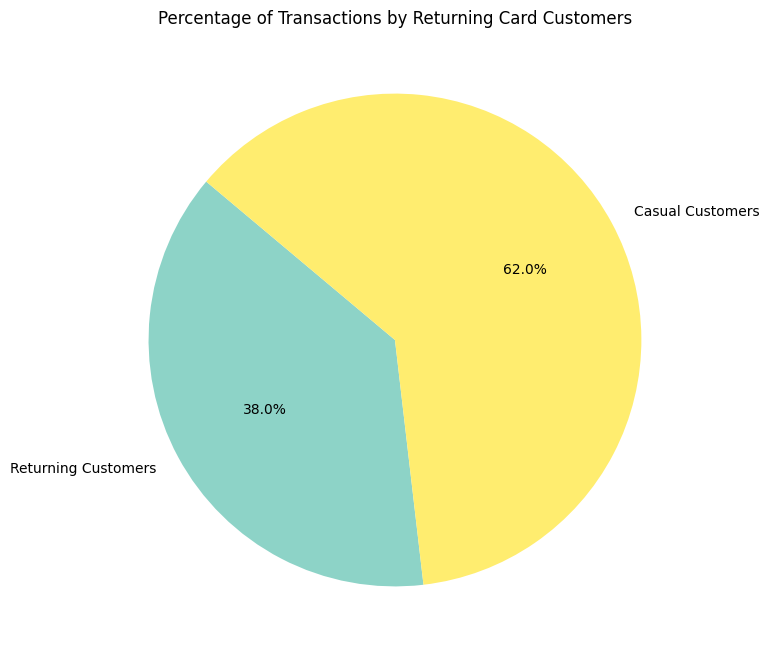

In [8]:
# ------- RETURNING CARD CUSTOMERS PERCENTAGE PIECHART ------- #
# Find returning card customers
returning_customers = df['card'].value_counts()
returning_customers = returning_customers[returning_customers > 1].index
returning_customers_df = df[df['card'].isin(returning_customers)]
returning_customers_count = returning_customers_df['card'].value_counts()
returning_customers_count = returning_customers_df['card'].nunique()
casual_customers_count = df['card'].nunique() - returning_customers_count

# Prepare the data for plotting
customer_counts = pd.Series([returning_customers_count, casual_customers_count],
                            index=['Returning Customers', 'Casual Customers'])

# Plotting returning card customers
plt.figure(figsize=(8, 8))
customer_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Set3')
plt.title('Percentage of Transactions by Returning Card Customers')
plt.ylabel('')
plt.show()

# **Percentage of Transactions by Returning Card Customers**
**Trend:**
- Casual vs. Returning Customers: A larger proportion of transactions (62%) are made by casual card customers, while returning card customers account for 38% of transactions.
- Customer Retention Insight: The data suggests that while casual customers make up the majority, a significant portion of transactions still comes from returning customers, highlighting some level of customer retention.

**Pattern:** There is a significant number of returning customers, though casual customers form the majority.

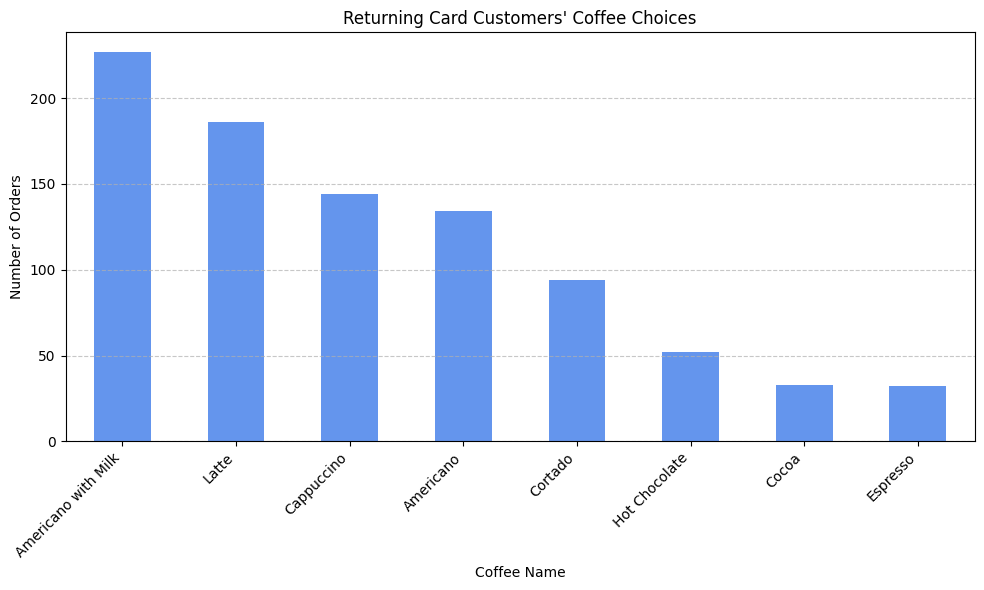

In [9]:
# ------- RETURNING CARD CUSTOMER'S COFFEE CHOICE ------- #
# Calculate returning card customer's coffee choice
coffee_choices = returning_customers_df['coffee_name'].value_counts()

# Plotting returning card customer's coffee choice
plt.figure(figsize=(10, 6))
coffee_choices.plot(kind='bar', color='cornflowerblue')
plt.title("Returning Card Customers' Coffee Choices")
plt.xlabel('Coffee Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Returning Card Customers' Coffee Choices**
**Trend:**
- Popular Choices: Among returning card customers, "Americano with Milk" is the most popular coffee choice, followed by "Latte" and "Cappuccino".
- Diverse Preferences: The bar chart shows a preference for milk-based coffee drinks, with "Americano with Milk" and "Latte" leading the choices. Other options like "Cappuccino," "Americano," and "Cortado" also have a notable number of orders, but there is less interest in "Hot Chocolate," "Cocoa," and "Espresso."

**Pattern:** Returning customers show a strong preference for milk-based coffee drinks.

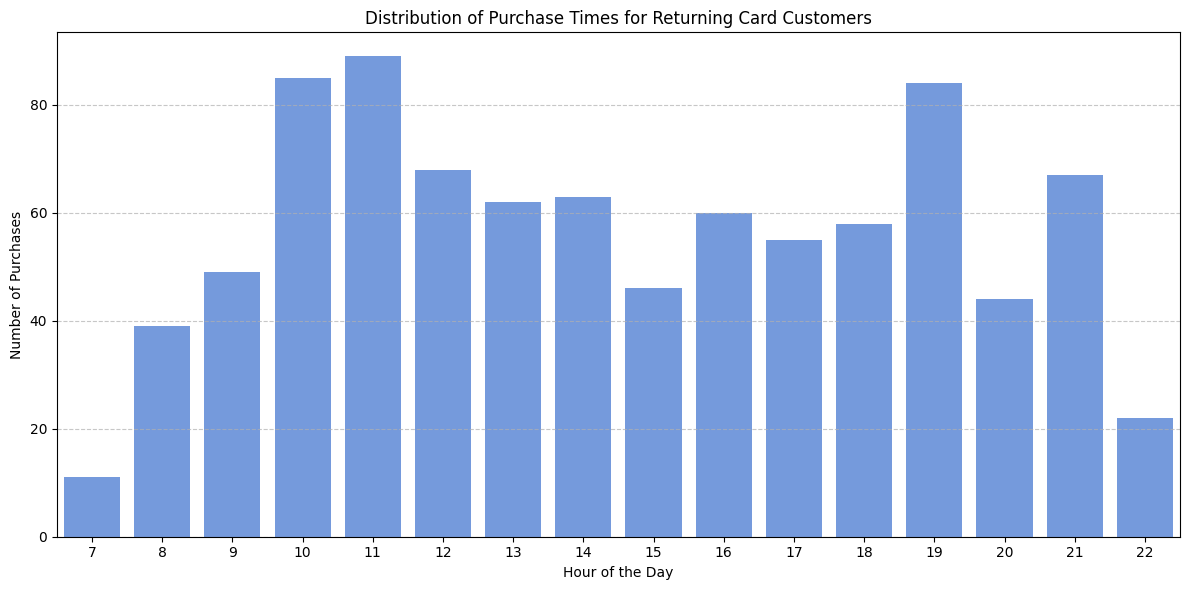

In [10]:
# ------- RETURNING CARD CUSTOMER HOURLY DISTRIBUTION ------- #
# Group by hour to get the number of purchases at each hour
hourly_purchases = returning_customers_df.groupby('hour')['money'].count()

# Plotting the distribution of purchase times for returning card customers
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_purchases.index, y=hourly_purchases.values, color='cornflowerblue')
plt.title('Distribution of Purchase Times for Returning Card Customers')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Purchases')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Distribution of Purchase Times for Returning Card Customers**
**Trends:**
- Morning Peak: The highest number of purchases occur at 10:00 AM, indicating a strong morning engagement from returning customers.
- Evening Peak: Another significant peak is seen at 7:00 PM, suggesting high activity in the evening as well.
- Sustained Activity: There is a sustained high level of purchases from 10:00 AM to 2:00 PM and again from 4:00 PM to 8:00 PM.

**Patterns:** 
- Bimodal Distribution: The activity is not evenly distributed across the day but shows two main peaks—one in the morning and one in the evening.
- Afternoon Dip: There is a noticeable decline in purchase activity around 3:00 PM to 4:00 PM, followed by a rise again in the evening.
- Low Activity: Early morning (7:00 AM) and late night (10:00 PM) see the least number of purchases, indicating these are off-peak times.

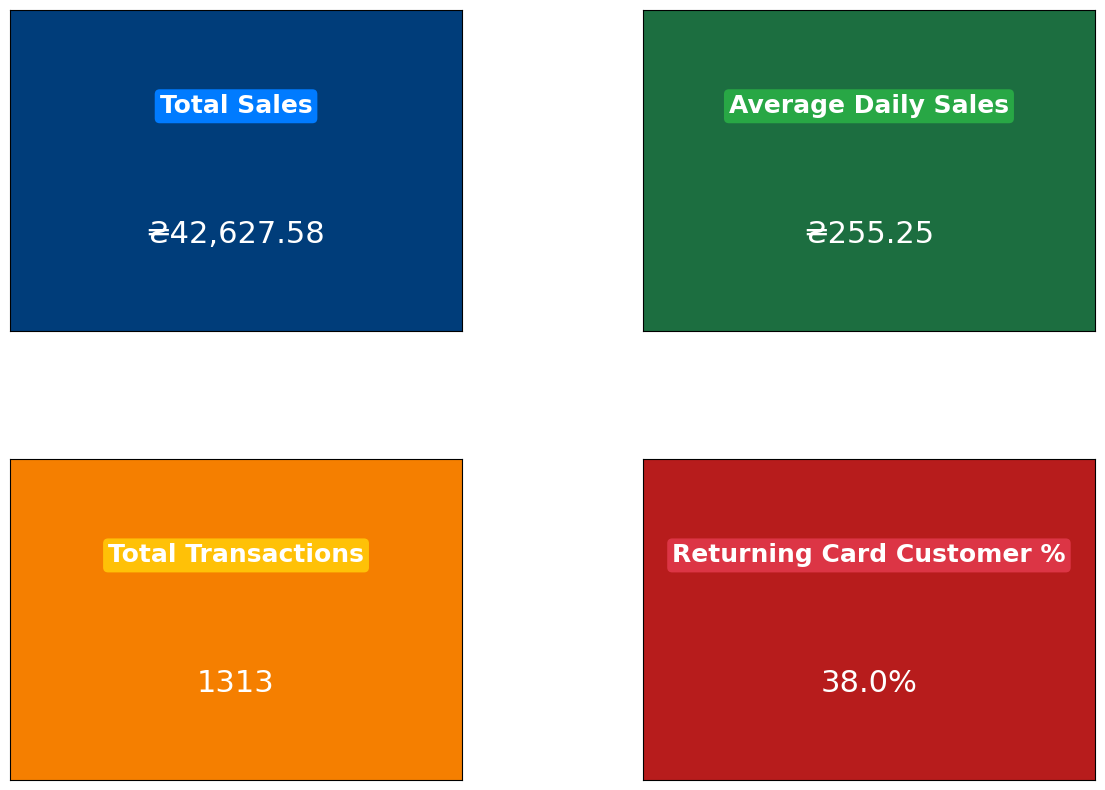

In [11]:
# ------- CARDS ------- #
# Calculate sales
total_sales = df['money'].sum()
total_transactions = df['money'].count()
returning_customers_percentage = (returning_customers_count / df['card'].nunique()) * 100

# Create a figure to display the cards
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

def add_card(ax, title, text, color, bg_color):
    ax.set_facecolor(bg_color)
    ax.text(0.5, 0.7, title, fontsize=18, fontweight='bold', ha='center', va='center', color='white', bbox=dict(facecolor=color, edgecolor='none', boxstyle='round,pad=0.2'))
    ax.text(0.5, 0.3, text, fontsize=22, ha='center', va='center', color='white')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

add_card(axs[0, 0], 'Total Sales', f'₴{total_sales:,.2f}', '#007BFF', '#003D7A')
add_card(axs[0, 1], 'Average Daily Sales', f'₴{daily_avg:,.2f}', '#28A745', '#1C6E40')
add_card(axs[1, 0], 'Total Transactions', f'{total_transactions}', '#FFC107', '#F57F00')
add_card(axs[1, 1], 'Returning Card Customer %', f'{returning_customers_percentage:.1f}%', '#DC3545', '#B71C1C')

plt.show()

# **Sales and Transaction Metrics**
**Trends:**
- Strong Revenue Generation: The total sales of ₴42,627.58 suggest a strong revenue flow, with an average daily sales figure of ₴255.25.
- Consistent Transactions: With 1313 total transactions, the business sees steady customer engagement.
- Loyal Customer Base: 38% of transactions come from returning card customers, indicating good customer retention.

**Patterns:** The average daily sales indicate consistent performance without large fluctuations in daily revenue and the significant percentage of returning customers points to a stable and loyal customer base, which contributes to nearly 40% of all transactions.

# **Summary**

The coffee sales analysis reveals valuable insights into sales trends, customer behavior, and product popularity. Daily sales exhibit fluctuations, with notable patterns emerging when comparing daily, weekly, and monthly averages. Certain coffee types consistently outperform others in both total revenue and frequency of sales, indicating strong customer preferences. Returning customers demonstrate distinct purchasing patterns, favoring specific coffee types and showing peak buying times, which underscores the importance of customer retention. Additionally, payment method analysis shows that card payments often lead in sales volume. Overall, the analysis highlights key areas for optimizing product offerings, marketing strategies, and operations to boost sales and enhance customer satisfaction.